# GRIP APR21- The Spark Foundation

### Notebook Author- Sudhir Vishwakarma

## Task 1

# Predicting Scores of students using machine learning

This notebook looks into various Python based machine learning and data science libraries in an attempt to build a machine learing model capable of predicting marks of students based on the number of hours they study.

we are going to take following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement,
     Given hours of study we can predict marks of students or not and what is the percentage of marks achieved by a
     student if he study for 9.25 hours a day.

## 2. Data

The data is available at "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

## 3. Evaluation

We want to achieve atleast 90% accuracy in our prediction.

## 4. Features

This dataset has only two features:
1. Scores ( Percentage score achieve by a student )
2. Hours  ( Number of hours they study )

## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

## Load Data

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.shape

(25, 2)

As we can see from data shape that it is a very small dataset. As here are only 25 rows and 2 columns.

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see there is no null values found and all datatype is in numerical format that means we can do further process on our dataset.

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Exploratory Data Analysis (EDA)


Hours        AxesSubplot(0.125,0.125;0.352273x0.755)
Scores    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

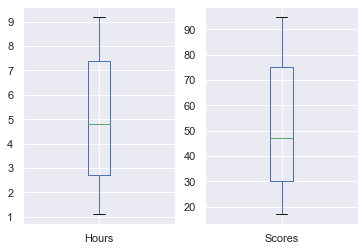

In [6]:
df.plot(kind='box',subplots=True)

As we can see from visualisation that there are no outlier present in the dataset.

### Plottin KDE to find out the skewness of attributes

<AxesSubplot:xlabel='Scores', ylabel='Density'>

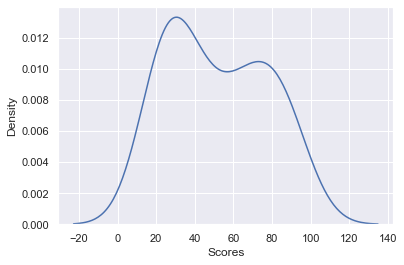

In [7]:
sns.kdeplot(data=df['Scores'])

<AxesSubplot:xlabel='Hours', ylabel='Density'>

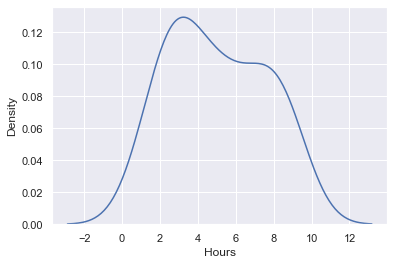

In [8]:
sns.kdeplot(data=df['Hours'])

In [9]:
df.skew(axis=0)

Hours     0.190338
Scores    0.233965
dtype: float64

We can see from visualisation that the data is slightly skewed to right and skewness value is very low so we can neglect it.

## Plotting a Scatter Plot to see the distribution of data 

Text(0, 0.5, 'Percentage Score ( Scores )')

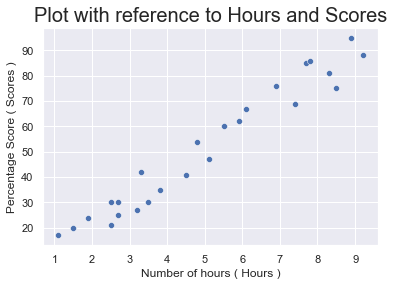

In [10]:
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.title('Plot with reference to Hours and Scores',fontsize=20)
plt.xlabel('Number of hours ( Hours )')
plt.ylabel('Percentage Score ( Scores )')

As we can see from visualisation that there is positive relation between the hours and scores.

## 5. Modelling

In [11]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
# Split data into X and y
X=df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
# X=df[['Hours']]
# y=df[['Scores']]

In [13]:
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [14]:
np.random.seed(42)

# Split data into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

In [15]:
X_train,len(X_train)

(array([[2.7],
        [3.3],
        [5.1],
        [3.8],
        [1.5],
        [3.2],
        [4.5],
        [8.9],
        [8.5],
        [3.5],
        [2.7],
        [1.9],
        [4.8],
        [6.1],
        [7.8],
        [5.5],
        [7.7],
        [1.1],
        [7.4],
        [9.2]]),
 20)

In [16]:
y_train,len(y_train)

(array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
        17, 69, 88], dtype=int64),
 20)

Now we got our data split into training and test set it's time to build a machine learning model.

We'll train it (find the pattern) on the training set.

And we'll test it(use the pattern) on the test set

As it is small linear dataset we will use LinearRegression machine learning model.

In [17]:
model=LinearRegression()

In [18]:
model.fit(X_train,y_train)

print('Training of the algorithm is complete.')

Training of the algorithm is complete.


### Plotting the regression line

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

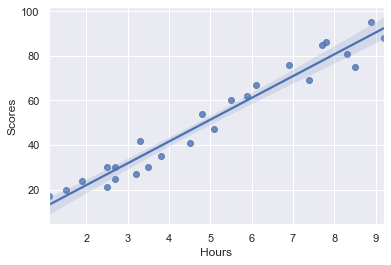

In [19]:
sns.regplot(data=df,x='Hours',y='Scores')

### Making Predictions

In [20]:
# Fitting model on test data and seeing its score on test data

model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.9678055545167994


As we can see that model is 96% Accurate So now we predict values using it and see the results.

In [21]:
print(X_test)
y_pred=model.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [22]:
# Comparing actual value VS predicted values
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


We can see from the dataframe that model is pretty much accurate in predicting the scores of the students.

In [23]:
# Now we are going to find out if a student studied 9.25 hours a day how much score he will achieve.

hours = np.array(9.25).reshape(-1,1)
cust_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(cust_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494


## Model Evaluation

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error, mean absolute error, R squared

In [24]:
print('Mean Square Error:',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('R Squared:',r2_score(y_test,y_pred))

Mean Square Error: 18.943211722315272
Mean Absolute Error: 3.9207511902099244
R Squared: 0.9678055545167994


Here mean Square error and Mean Absolute error is very low so we can say that our model fit pretty accurate.

# 6. Experimentation

Now we are going to find out the marks manually and also draw regression line.

## Now we find out marks using stats model

In [25]:
import statsmodels.api as sm

In [26]:
y=df['Scores']

In [27]:
x1=df['Hours']

In [28]:
x=sm.add_constant(x1)

In [29]:
result=sm.OLS(y,x).fit()

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           9.13e-17
Time:                        22:34:53   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

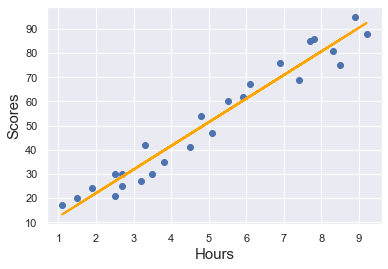

In [31]:
# Plotting the regression line
plt.scatter(x1,y)
line=9.7758*x1+2.4837
fig=plt.plot(x1,line,lw=2,c='orange',label='Regression Line')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.show()

### So if we now want to check the how many marks a student get when he study for 9.5 hour we can simply put coefficient value in the equation of regression.

In [32]:
marks=2.4837+9.7758*9.25

In [33]:
print(marks)

92.90985


# Conclusion

By seeing both ways we can see that by both ways we are getting almost same prediction when a student study for 9.25 hours a day that is 92% marks.